<a href="https://colab.research.google.com/github/HARSHGit45/Machine_Learning_assignment/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df=df.drop('User ID',axis=1)

In [8]:
mp={'Male':0 , 'Female':1}
df['Gender']=df['Gender'].map(mp)


In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [11]:
x=df.iloc[:,:3]
y=df.iloc[:,3]

In [12]:
x

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


<Axes: xlabel='Purchased', ylabel='count'>

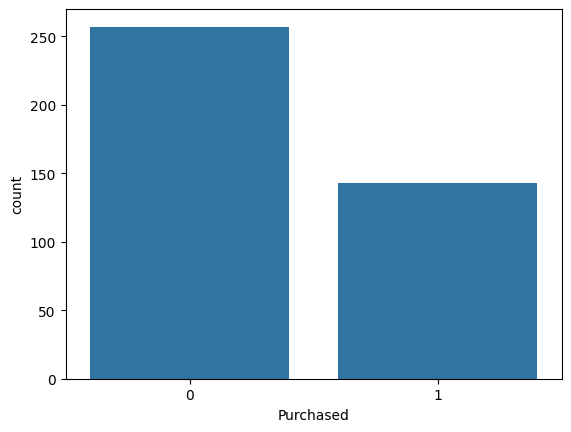

In [13]:
sns.countplot(data=df,x=y)

In [47]:
dt=tree.DecisionTreeClassifier(criterion="log_loss",splitter="best",random_state=0,)
s=StandardScaler()
x=s.fit_transform(x)

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [49]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='log_loss', random_state=0)

[Text(0.4642857142857143, 0.9615384615384616, 'x[1] <= 0.463\nlog_loss = 0.943\nsamples = 280\nvalue = [179, 101]'),
 Text(0.2857142857142857, 0.8846153846153846, 'x[2] <= 0.61\nlog_loss = 0.667\nsamples = 201\nvalue = [166, 35]'),
 Text(0.14285714285714285, 0.8076923076923077, 'x[1] <= -0.11\nlog_loss = 0.223\nsamples = 167\nvalue = [161, 6]'),
 Text(0.10714285714285714, 0.7307692307692307, 'log_loss = 0.0\nsamples = 110\nvalue = [110, 0]'),
 Text(0.17857142857142858, 0.7307692307692307, 'x[2] <= -0.066\nlog_loss = 0.485\nsamples = 57\nvalue = [51, 6]'),
 Text(0.14285714285714285, 0.6538461538461539, 'log_loss = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.21428571428571427, 0.6538461538461539, 'x[2] <= 0.404\nlog_loss = 0.722\nsamples = 30\nvalue = [24, 6]'),
 Text(0.17857142857142858, 0.5769230769230769, 'x[1] <= -0.015\nlog_loss = 0.663\nsamples = 29\nvalue = [24, 5]'),
 Text(0.07142857142857142, 0.5, 'x[2] <= 0.022\nlog_loss = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.0357142

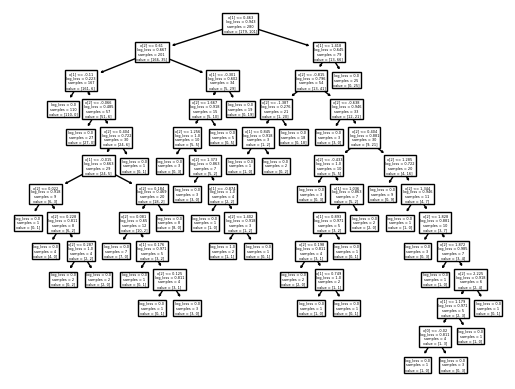

In [50]:
tree.plot_tree(dt)

In [51]:
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("sn")

'sn.pdf'

In [52]:
pred=dt.predict(xtest)

In [53]:
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [54]:
cm=confusion_matrix(pred,ytest)
cm

array([[70,  7],
       [ 8, 35]])

<Axes: >

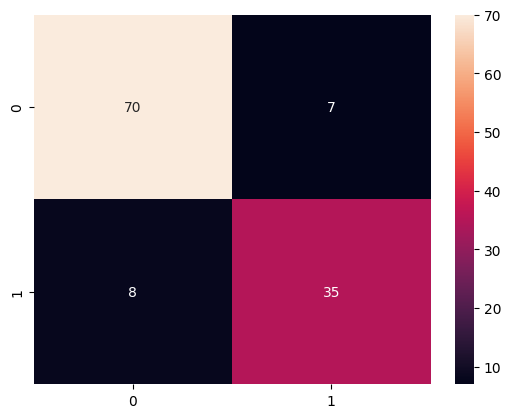

In [55]:
sns.heatmap(cm,annot=True)

In [56]:
acc=accuracy_score(pred,ytest)
acc

0.875